In [3]:
#Importing the required libs

import numpy as np 
import pandas as pd 
import time
import lightgbm as lgb
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
%matplotlib inline

In [9]:
#Reading the data and convert the index into datetime object

df = pd.read_csv('train.csv', index_col=0)
df.index = pd.to_datetime(df.index)
df.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


# Store Sales Trend Analysis
Looking for any seasonality trends in the total store sales. We'll group the sales by week so that the trend can be viewed more clearly.

In [14]:
stores = pd.DataFrame(df.groupby(['date','store']).sum()['sales']).unstack()
stores = stores.resample('7D',label='left').sum()
stores.sort_index(inplace = True)
stores.head()

sales                                                            
store         1      2      3      4     5     6     7      8      9      10
date                                                                        
2013-01-01  9461  13209  11658  10918  7704  8025  7028  12684  10633  11516
2013-01-08  9325  13459  11959  10859  7898  7897  7316  12663  10869  11634
2013-01-15  9266  13306  11633  10778  7865  7851  7104  12754  10798  11558
2013-01-22  9247  13286  11871  10729  7782  7950  7271  12726  10957  11618
2013-01-29  9967  14210  12567  11743  8333  8453  7536  13402  11518  12448

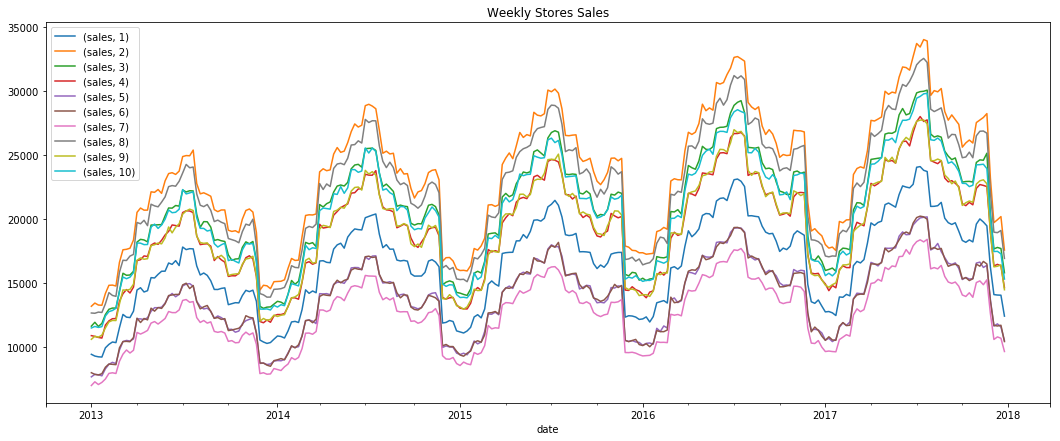

In [25]:
stores.plot(figsize=(18,7), title='Weekly Stores Sales')
plt.legend(loc='upper left')
plt.show()

In [97]:
# Considering various quartile of the stores sales 

store_qtr = pd.DataFrame(stores.quantile([0.0,0.25,0.5,0.75,1.0],axis=1)).transpose()
store_qtr.sort_index(inplace = True)
store_qtr.columns = ['Min','25%','50%','75%','Max']
store_qtr.head()

,Min,25%,50%,75%,Max
date,,,,,
2013-01-01,7028.0,8384.00,10775.5,11622.50,13209.0
2013-01-08,7316.0,8254.75,10864.0,11877.75,13459.0
2013-01-15,7104.0,8215.25,10788.0,11614.25,13306.0
2013-01-22,7271.0,8274.25,10843.0,11807.75,13286.0
2013-01-29,7536.0,8831.50,11630.5,12537.25,14210.0


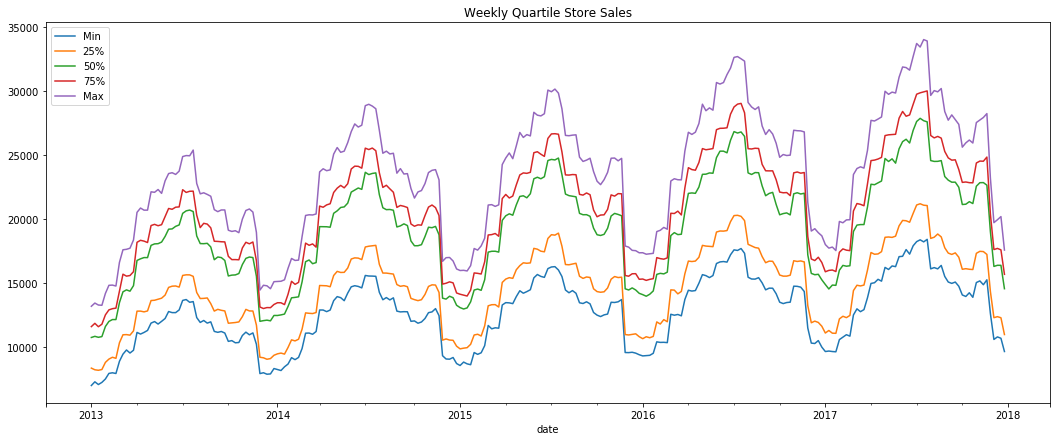

In [37]:
#Plotting the trends for various quartile of store sales

store_qtr.plot(figsize=(18,7), title='Weekly Quartile Store Sales')
plt.legend(loc='upper left')
plt.show()

There is a considerable gap between the 25% quartile and the median. But there is a general seasonality similar for each store as shown in the previous chart as well. They have peaks and falls during the same periods of time.

# Item Sales Trend Analysis
Looking for any seasonality trends in the total store sales again on weekly sales.

In [31]:
items = pd.DataFrame(df.groupby(['date','item']).sum()['sales']).unstack()
items = items.resample('7D',label='left').sum()
items.sort_index(inplace = True)

items.head(7)

sales                                                      ...   \
item          1     2     3    4    5     6     7     8     9     10  ...    
date                                                                  ...    
2013-01-01   894  2320  1444  834  664  2214  2207  2978  1934  2938  ...    
2013-01-08   863  2348  1466  839  714  2299  2335  3130  2019  2886  ...    
2013-01-15   867  2411  1444  854  685  2286  2371  3091  2078  2859  ...    
2013-01-22   816  2331  1411  836  759  2296  2255  3053  2046  2926  ...    
2013-01-29   969  2470  1528  939  760  2485  2547  3305  2218  3016  ...    
2013-02-05   920  2611  1641  967  769  2565  2539  3330  2286  3226  ...    
2013-02-12   943  2628  1609  972  815  2566  2601  3320  2305  3195  ...    

                                                                       
item          41    42    43    44    45    46   47    48    49    50  
date                                                                   
2013-01-01   873  1443  2043  1223  3130  2313  861  2095  1206  2550  
2013-01-08   901  1468  2044  1188  3180  2408  874  2008  1183  2665  
2013-01-15   846  1517  2022  1204  3207  2299  886  1988  1101  2645  
2013-01-22   871  1437  2021  1122  3152  2305  895  1946  1133  2601  
2013-01-29   931  1517  2195  1240  3338  2496  943  2144  1204  2735  
2013-02-05   968  1590  2185  1231  3516  2587  953  2207  1294  2879  
2013-02-12  1051  1596  2246  1250  3567  2533  934  2254  1294  2902  

[7 rows x 50 columns]

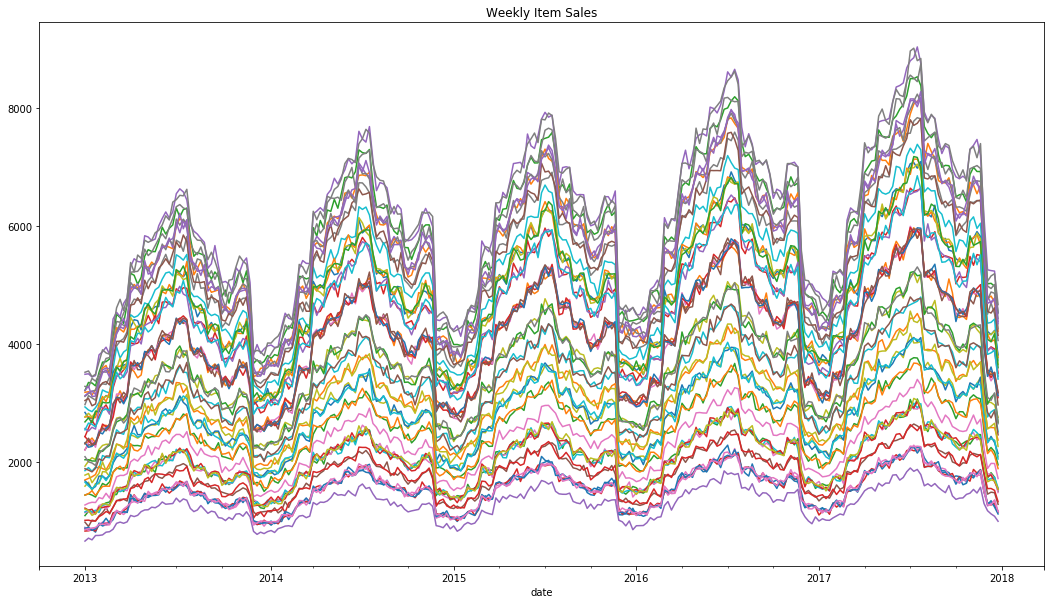

In [33]:
items.plot(figsize=(18,10), title='Weekly Item Sales', legend=None)
plt.show()

In [98]:
# Considering every 10% quartile of the item sales

item_WK_qtr = pd.DataFrame(items.quantile([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],axis=1)).transpose()
item_WK_qtr.sort_index(inplace = True)
item_WK_qtr.columns = ['Min','10%','20%','30%','40%','50%','60%','70%','80%','90%','Max']
item_WK_qtr.head()

,Min,10%,20%,30%,40%,50%,60%,70%,80%,90%,Max
date,,,,,,,,,,,
2013-01-01,664.0,893.1,1156.8,1443.7,1749.2,2069.0,2324.0,2605.9,2946.0,3190.0,3526.0
2013-01-08,714.0,898.3,1180.4,1467.4,1776.6,2031.5,2353.6,2691.4,2925.4,3203.4,3548.0
2013-01-15,685.0,884.1,1140.6,1495.1,1713.6,2050.0,2330.2,2682.8,2878.8,3205.2,3452.0
2013-01-22,759.0,893.5,1145.8,1429.2,1770.0,2033.5,2332.6,2654.7,2938.6,3221.9,3493.0
2013-01-29,760.0,966.8,1217.6,1524.7,1867.6,2206.5,2502.8,2868.1,3065.4,3377.8,3821.0


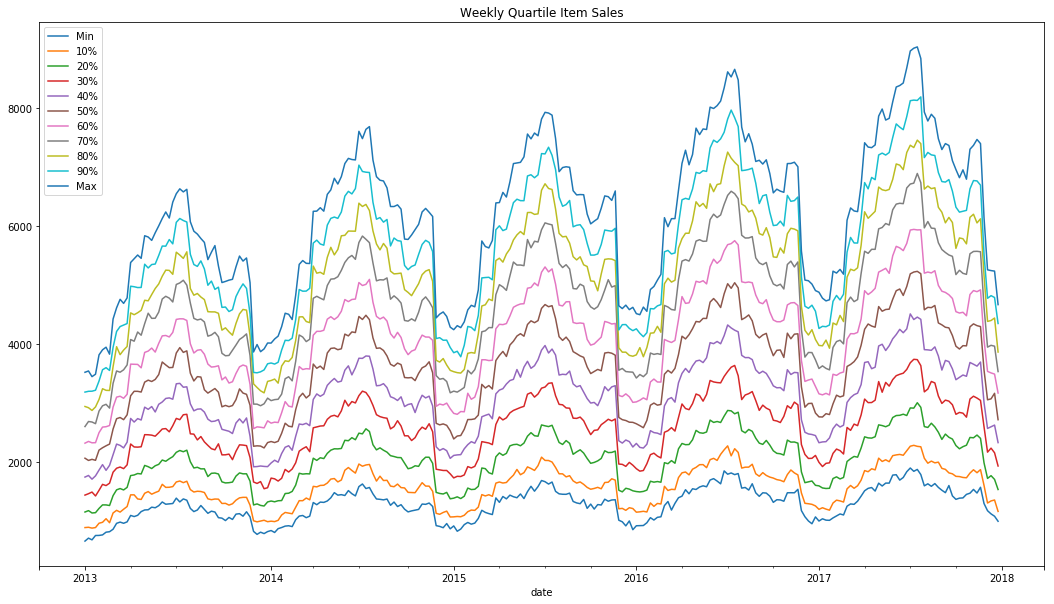

In [38]:
#Plotting the trends for every 10% quartile of item sales

item_WK_qtr.plot(figsize=(18,10), title='Weekly Quartile Item Sales')
plt.show()

# Item sale across stores
Checking the percentage of item sales across stores.

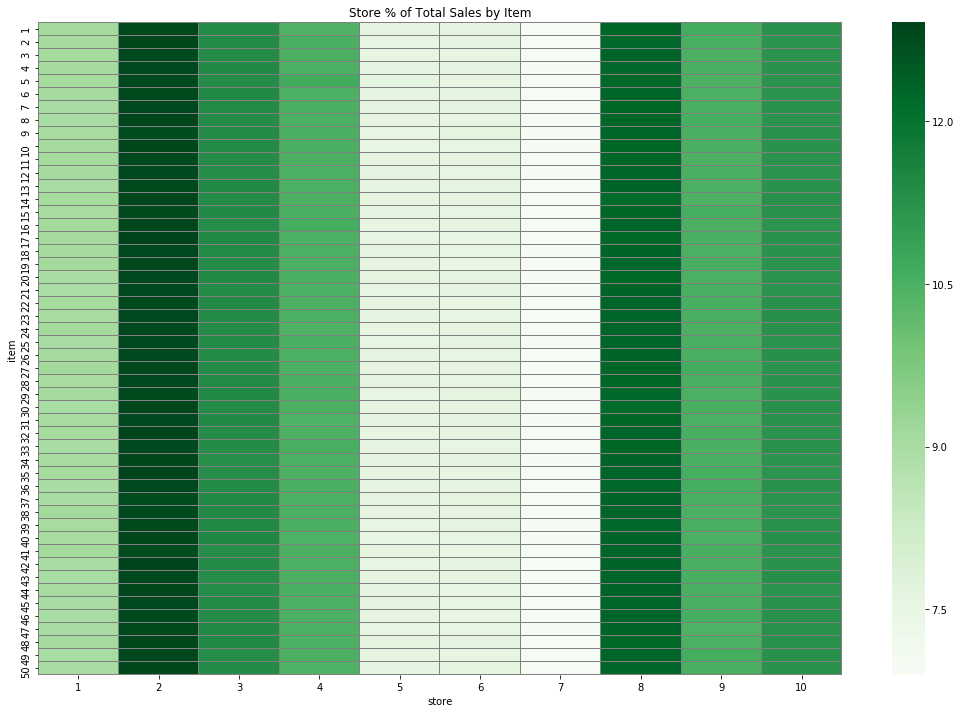

In [82]:
#Plot for the % distribution of each item's sales across the stores

store_item = df.groupby(by=['item','store']).sum()['sales'].groupby(level=0).apply(
    lambda x: 100* x/ x.sum()).unstack()

plt.figure(figsize = (18,12))
sns.heatmap(store_item, cmap='Greens', linewidths=0.01, linecolor='gray').set_title(
   'Store % of Total Sales by Item')
plt.show()

As we can see, the items are sold evenly across every store.

#### Let's look at the % distribution of each store's sales across the different items.

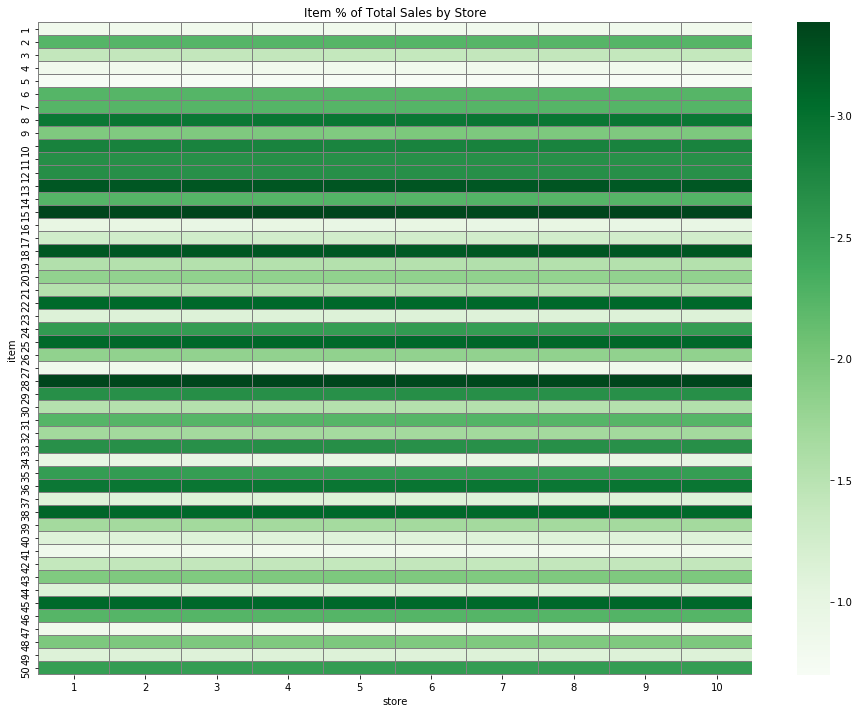

In [83]:
#Plot for the % distribution of each stores's sales across different items

item_store = df.groupby(by=['store','item']).sum()['sales'].groupby(level=0).apply(
    lambda x: 100* x/ x.sum()).unstack().transpose()
plt.figure(figsize = (16,12))
sns.heatmap(item_store , annot=False, linewidths=0.01, linecolor='gray',cmap='Greens').set_title(
    'Item % of Total Sales by Store')
plt.show()

We can see that each store overall sold roughly the same percentage of each item.

### So we can conclude that Items have been sold in same percentage across all the stores

# Sales variability with Day of Week
Checking the sales percentage variance with respect to the day of week

In [84]:
df['Day'] = df.index.weekday_name
df.head()

,store,item,sales,Day
date,,,,
2013-01-01,1,1,13,Tuesday
2013-01-02,1,1,11,Wednesday
2013-01-03,1,1,14,Thursday
2013-01-04,1,1,13,Friday
2013-01-05,1,1,10,Saturday


Checking how sales vary with day of week across stores

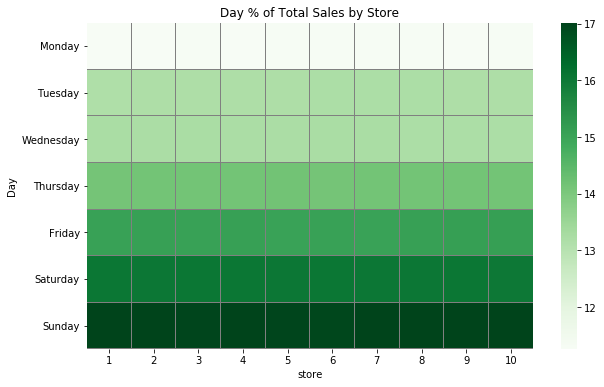

In [95]:
# Plot for % mix of store sales by day

dow_store = df.groupby(['store','Day']).sum()['sales'].groupby(level=0).apply(
    lambda x: 100* x/ x.sum()).unstack().loc[:,['Monday',
                                                'Tuesday',
                                                'Wednesday',
                                                'Thursday',
                                                'Friday',
                                                'Saturday',
                                                'Sunday']].transpose()
plt.figure(figsize = (10,6))
sns.heatmap(dow_store, cmap='Greens', linewidths=0.01, linecolor='gray').set_title(
    'Day % of Total Sales by Store')
plt.show()

We can see above that the sales are are very similar in a day across the stores

#### Checking how sales vary with day of week across items

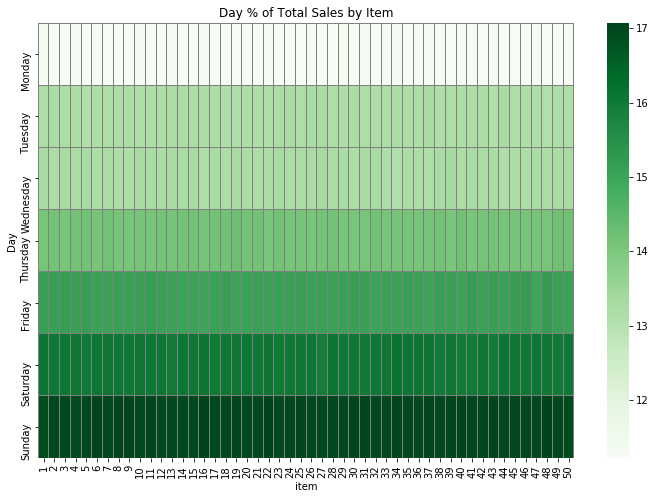

In [96]:
# Plot for % mix of item sales by day

dow_item = df.groupby(['item','Day']).sum()['sales'].groupby(level=0).apply(
    lambda x: 100* x/ x.sum()).unstack().loc[:,['Monday',
                                                'Tuesday',
                                                'Wednesday',
                                                'Thursday',
                                                'Friday',
                                                'Saturday',
                                                'Sunday']].transpose()
plt.figure(figsize = (12,8))
sns.heatmap(dow_item, cmap='Greens', linewidths=0.01, linecolor='gray').set_title(
    'Day % of Total Sales by Item')
plt.show()

We can see above that each item's sales are nearly identical in a day.


#### Checking if each day generally trends the same as the total week.

In [16]:
dow = pd.DataFrame(df.groupby(['date','Day']).sum()['sales']).unstack()['sales'].loc[:,
                                                                                ['Monday',
                                                                               'Tuesday',
                                                                               'Wednesday',
                                                                               'Thursday',
                                                                               'Friday',
                                                                               'Saturday',
                                                                               'Sunday']]
dow = dow.resample('7D',label='left').sum()
dow.sort_index(inplace = True)

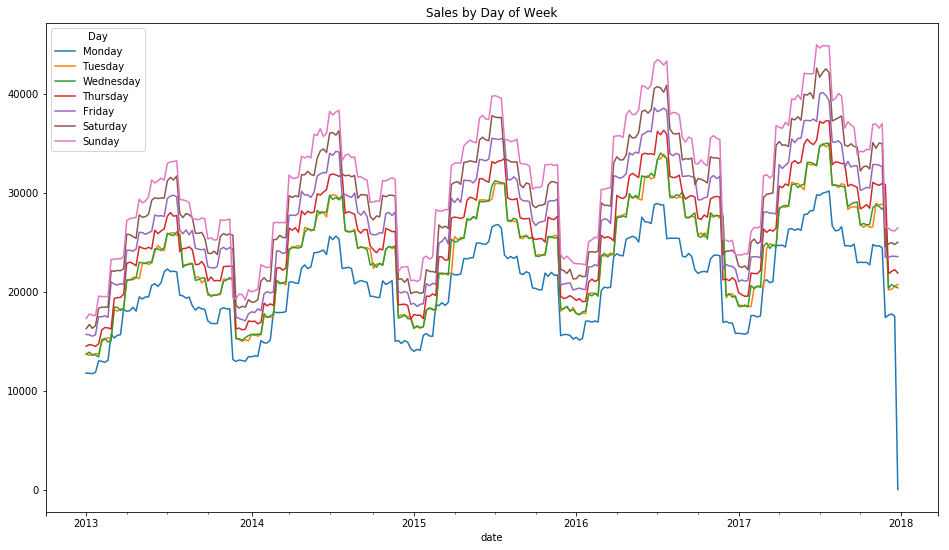

In [17]:
dow.plot(figsize=(16,9), title='Sales by Day of Week')
plt.show()

### So we can conclude that Day of week does impact sales, however all stores & items have similar distributions. And also that Day of week trends follow general weekly trend.

## Data Exploration Results
Considering how similar the trends and seasonalities are for the given data, we can safely assume that the data has indeed been simulated.

# Models Training

## Simplistic Model

With the assumption that the Data has been Simulated, lets first build a simple model that forecasts sales based on the sale history of each item in each store in the last 5 years.

In [100]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [101]:
train['date']=pd.to_datetime(train['date'])
test['date']=pd.to_datetime(test['date'])

In [102]:
print(train.dtypes,'\n',test.dtypes)

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object 
 id                int64
date     datetime64[ns]
store             int64
item              int64
dtype: object


In [103]:
def features(df):
    df['year']=df['date'].dt.year
    df['month']=df['date'].dt.month
    df['week']=df['date'].dt.weekday
    df['weeknum']=df['date'].dt.week
    return df

In [104]:
features(train)
features(test)
print(train.head(10))

        date  store  item  sales  year  month  week  weeknum
0 2013-01-01      1     1     13  2013      1     1        1
1 2013-01-02      1     1     11  2013      1     2        1
2 2013-01-03      1     1     14  2013      1     3        1
3 2013-01-04      1     1     13  2013      1     4        1
4 2013-01-05      1     1     10  2013      1     5        1
5 2013-01-06      1     1     12  2013      1     6        1
6 2013-01-07      1     1     10  2013      1     0        2
7 2013-01-08      1     1      9  2013      1     1        2
8 2013-01-09      1     1     12  2013      1     2        2
9 2013-01-10      1     1      9  2013      1     3        2


In [106]:
#Weekday 6- is sunday so we take sales value on sunday for week number 1 (1 of 52) , item number 1 store 1 month 1 and for different year( 5 years from 2013-2017)
x=train[(train['item']==1) & (train['store']==1) & (train['week']==6) & (train['weeknum']==1) & (train['month']==1) ]
x.head()

,date,store,item,sales,year,month,week,weeknum
5,2013-01-06,1,1,12,2013,1,6,1
369,2014-01-05,1,1,17,2014,1,6,1
733,2015-01-04,1,1,14,2015,1,6,1
1104,2016-01-10,1,1,26,2016,1,6,1
1468,2017-01-08,1,1,20,2017,1,6,1


In [107]:
def fun(item,store,week,weeknum,month):
    x=train[(train['item']==item) & (train['store']==store) & (train['week']==week)& (train['weeknum']==weeknum) & (train['month']==month) ]
    return np.ceil(6*(x.sales.mean()/5)).astype(int)-1

In [113]:
y=[]
for index, i in test.iterrows():
    y.append(fun(i['item'],i['store'],i['week'],i['weeknum'],i['month']))

In [114]:
id1=pd.read_csv("test.csv",usecols=['id'])

In [115]:
sub=pd.DataFrame({'id':id1.id,'sales':y})
sub.head(5)

,id,sales
0,0,16
1,1,13
2,2,15
3,3,15
4,4,18


In [116]:
sub.to_csv("SIMPLE_MODEL.csv",index=False)

### The Simplistic model gave a score of 15.74

# Light GBM

In [117]:
def add_agg(merged_df, gr_cols, new_col_name, incr_yr):
    agg1 = train_df.groupby(gr_cols)['target'].agg('mean').reset_index()
    cols2 = gr_cols.copy()
    cols2.append(new_col_name)
    agg1.columns = cols2
    if incr_yr:
        agg1['year']+=1
    merged_df = pd.merge(merged_df, agg1, how='left', left_on=gr_cols, right_on=gr_cols)
    return merged_df

In [118]:
train_gbm   = pd.read_csv( 'train.csv', nrows=None)
test_gbm    = pd.read_csv( 'test.csv', nrows=None)

In [119]:
merged_df = pd.concat([train_gbm, test_gbm], sort=False)

# adding columns: date related
merged_df['date']  = pd.to_datetime(merged_df['date'],infer_datetime_format=True)
merged_df['year']  = merged_df['date'].dt.year
merged_df['month']  = merged_df['date'].dt.month
merged_df['day']   = merged_df['date'].dt.dayofweek
merged_df.drop('date', axis=1, inplace=True)

In [120]:
merged_df.head()

,store,item,sales,id,year,month,day
0,1,1,13.0,NaN,2013,1,1
1,1,1,11.0,NaN,2013,1,2
2,1,1,14.0,NaN,2013,1,3
3,1,1,13.0,NaN,2013,1,4
4,1,1,10.0,NaN,2013,1,5


In [121]:
# adding grouped columns
train_df=pd.DataFrame(merged_df[merged_df.sales.notna()].values)
train_df.columns=merged_df.columns
train_df['target']=train_df['sales'] # rename

In [122]:
# scale for item+store+year(prev) scale predictions back up!
merged_df = add_agg(merged_df,['item','store','year'], 'tsy', 1)
merged_df['sales']/=merged_df['tsy']
merged_df = merged_df[merged_df.year>2013]
tsy=merged_df.pop('tsy')

In [123]:
# pop sales and ID
ID=merged_df[merged_df.id.notna()]['id']
target=merged_df[merged_df.sales.notna()]['sales']
merged_df.drop(['id','sales'], axis=1, inplace=True)
len_train=target.shape[0]

In [124]:
# specifying configurations as a dict
params = {
    'nthread': 10,
    'max_depth': 8,
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression_l1',
    'metric': 'mape', # this is abs(a-e)/max(1,a)
    'num_leaves': 31,
    'learning_rate': 0.25,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'lambda_l1': 0.06,
    'lambda_l2': 0.1,
    'verbose': -1
}

In [125]:
# Training
num_folds = 5
test_x = merged_df[len_train:].values
all_x = merged_df[:len_train].values
all_y = target.values
oof_preds = np.zeros([all_y.shape[0]])
sub_preds = np.zeros([test_x.shape[0]])
feature_importance_df = pd.DataFrame()
folds = KFold(n_splits=num_folds, shuffle=True, random_state=345665)

In [127]:
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(all_x)):
    train_x, train_y = all_x[train_idx], all_y[train_idx]
    valid_x, valid_y = all_x[valid_idx], all_y[valid_idx]
    lgb_train = lgb.Dataset(train_x,train_y)
    lgb_valid = lgb.Dataset(valid_x,valid_y)
        
    # train
    gbm = lgb.train(params, lgb_train, 1000, 
        valid_sets=[lgb_train, lgb_valid],
        early_stopping_rounds=200, verbose_eval=100)
    oof_preds[valid_idx] = gbm.predict(valid_x, num_iteration=gbm.best_iteration)
    sub_preds[:] += gbm.predict(test_x, num_iteration=gbm.best_iteration) / folds.n_splits
    valid_idx += 1
    importance_df = pd.DataFrame()
    importance_df['feature'] = merged_df.columns
    importance_df['importance'] = gbm.feature_importance()
    importance_df['fold'] = n_fold + 1
    feature_importance_df = pd.concat([feature_importance_df, importance_df], axis=0)

Training until validation scores don't improve for 200 rounds.
[100]	training's mape: 0.109105	valid_1's mape: 0.109617
[200]	training's mape: 0.108821	valid_1's mape: 0.109695
Early stopping, best iteration is:
[18]	training's mape: 0.109478	valid_1's mape: 0.109514
Training until validation scores don't improve for 200 rounds.
[100]	training's mape: 0.109119	valid_1's mape: 0.109708
[200]	training's mape: 0.10881	valid_1's mape: 0.109774
Early stopping, best iteration is:
[60]	training's mape: 0.109282	valid_1's mape: 0.109658
Training until validation scores don't improve for 200 rounds.
[100]	training's mape: 0.10914	valid_1's mape: 0.109653
[200]	training's mape: 0.108828	valid_1's mape: 0.109725
Early stopping, best iteration is:
[21]	training's mape: 0.109471	valid_1's mape: 0.109601
Training until validation scores don't improve for 200 rounds.
[100]	training's mape: 0.109189	valid_1's mape: 0.109466
[200]	training's mape: 0.10888	valid_1's mape: 0.10954
Early stopping, best it

In [128]:
e = 2 * abs(all_y - oof_preds) / ( abs(all_y)+abs(oof_preds) )
e = e.mean()
print('Full validation score %.4f' %e)

Full validation score 0.1225


In [129]:
pred = (sub_preds * tsy[len_train:] ).astype(np.float32)
out_df = pd.DataFrame({'id': ID.astype(np.int32), 'sales': pred})
out_df.to_csv('submission_gbm.csv', index=False)

### LightGBM gave us a score of 13.93

# XGBoost

In [137]:
train_boost = pd.read_csv('train.csv')
test_boost = pd.read_csv('test.csv')
sample_boost = pd.read_csv('sample_submission.csv')

In [138]:
train_boost['date'] = pd.to_datetime(train_boost['date'])
test_boost['date'] = pd.to_datetime(test_boost['date'])

train_boost['month'] = train_boost['date'].dt.month
train_boost['day'] = train_boost['date'].dt.dayofweek
train_boost['year'] = train_boost['date'].dt.year

test_boost['month'] = test_boost['date'].dt.month
test_boost['day'] = test_boost['date'].dt.dayofweek
test_boost['year'] = test_boost['date'].dt.year

In [139]:
col = [i for i in test_boost.columns if i not in ['date','id']]
y = 'sales'

train_x, train_cv, y, y_cv = train_test_split(train_boost[col],train_boost[y], test_size=0.2, random_state=2018)

In [140]:
def XGB_regressor(train_X, train_y, test_X, test_y, feature_names=None, seed_val=2017, num_rounds=500):
    param = {}
    param['objective'] = 'reg:linear'
    param['eta'] = 0.1
    param['max_depth'] = 6
    param['silent'] = 1
    param['eval_metric'] = 'mae'
    param['min_child_weight'] = 1
    param['subsample'] = 0.7
    param['colsample_bytree'] = 0.7
    param['seed'] = seed_val
    num_rounds = num_rounds

    plst = list(param.items())

    xgtrain = xgb.DMatrix(train_X, label=train_y)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
        model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=20)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)
        
    return model

In [142]:
model = XGB_regressor(train_X = train_x, train_y = y, test_X = train_cv, test_y = y_cv)
y_test = model.predict(xgb.DMatrix(test_boost[col]), ntree_limit = model.best_ntree_limit)

[0]	train-mae:46.5912	test-mae:46.519
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 20 rounds.
[1]	train-mae:41.9404	test-mae:41.8664
[2]	train-mae:37.7841	test-mae:37.7111
[3]	train-mae:34.1215	test-mae:34.053
[4]	train-mae:30.9798	test-mae:30.913
[5]	train-mae:28.298	test-mae:28.2353
[6]	train-mae:26.0229	test-mae:25.9597
[7]	train-mae:24.0604	test-mae:23.9986
[8]	train-mae:22.4503	test-mae:22.3853
[9]	train-mae:21.1722	test-mae:21.1055
[10]	train-mae:20.1092	test-mae:20.039
[11]	train-mae:19.2822	test-mae:19.2087
[12]	train-mae:18.4302	test-mae:18.356
[13]	train-mae:17.7233	test-mae:17.6509
[14]	train-mae:17.0117	test-mae:16.9411
[15]	train-mae:16.6079	test-mae:16.5383
[16]	train-mae:16.0807	test-mae:16.0134
[17]	train-mae:15.7862	test-mae:15.72
[18]	train-mae:15.395	test-mae:15.3337
[19]	train-mae:15.0735	test-mae:15.016
[20]	train-mae:14.8984	test-mae:14.8426
[21]	train-mae:14.6468	test-mae:14.5916

[201]	train-mae:6.18416	test-mae:6.18152
[202]	train-mae:6.1771	test-mae:6.17462
[203]	train-mae:6.17025	test-mae:6.16787
[204]	train-mae:6.17026	test-mae:6.16788
[205]	train-mae:6.17027	test-mae:6.16788
[206]	train-mae:6.17016	test-mae:6.16774
[207]	train-mae:6.16721	test-mae:6.16483
[208]	train-mae:6.16145	test-mae:6.15897
[209]	train-mae:6.1544	test-mae:6.15232
[210]	train-mae:6.14905	test-mae:6.1468
[211]	train-mae:6.14272	test-mae:6.14068
[212]	train-mae:6.13575	test-mae:6.13384
[213]	train-mae:6.13096	test-mae:6.12923
[214]	train-mae:6.12294	test-mae:6.12125
[215]	train-mae:6.12137	test-mae:6.11962
[216]	train-mae:6.11871	test-mae:6.11711
[217]	train-mae:6.1187	test-mae:6.11709
[218]	train-mae:6.11145	test-mae:6.11004
[219]	train-mae:6.10939	test-mae:6.10805
[220]	train-mae:6.10572	test-mae:6.10462
[221]	train-mae:6.09755	test-mae:6.09656
[222]	train-mae:6.09739	test-mae:6.09644
[223]	train-mae:6.0972	test-mae:6.09622
[224]	train-mae:6.09698	test-mae:6.09602
[225]	train-mae:6.096

[402]	train-mae:5.78236	test-mae:5.79213
[403]	train-mae:5.78169	test-mae:5.79154
[404]	train-mae:5.78163	test-mae:5.7915
[405]	train-mae:5.78097	test-mae:5.79093
[406]	train-mae:5.77731	test-mae:5.78746
[407]	train-mae:5.77532	test-mae:5.7853
[408]	train-mae:5.77401	test-mae:5.7841
[409]	train-mae:5.77283	test-mae:5.78296
[410]	train-mae:5.77174	test-mae:5.78174
[411]	train-mae:5.76921	test-mae:5.7793
[412]	train-mae:5.76919	test-mae:5.77933
[413]	train-mae:5.76916	test-mae:5.77935
[414]	train-mae:5.76794	test-mae:5.77815
[415]	train-mae:5.76673	test-mae:5.77693
[416]	train-mae:5.76609	test-mae:5.77635
[417]	train-mae:5.76606	test-mae:5.77638
[418]	train-mae:5.76601	test-mae:5.77636
[419]	train-mae:5.76462	test-mae:5.77504
[420]	train-mae:5.76337	test-mae:5.7738
[421]	train-mae:5.76335	test-mae:5.77382
[422]	train-mae:5.76114	test-mae:5.77162
[423]	train-mae:5.7611	test-mae:5.77164
[424]	train-mae:5.76108	test-mae:5.77164
[425]	train-mae:5.76105	test-mae:5.77162
[426]	train-mae:5.7610

In [145]:
sample_boost['sales'] = y_test
sample_boost.to_csv('submission_xgb.csv', index=False)

### XGBoost gave us a score of 14.48

#### LightGBM has the best accuracy among all the models for the given Dataset while the Simplistic model isn't too bad either.